Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.shape

(308, 10)

In [4]:
df.isnull().sum()

id                0
sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,id,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.00000
mean,173.441558,0.491250,0.385601,0.135049,0.731093,0.285502,0.158534,0.234782,10.87987
std,100.524779,0.125718,0.103905,0.041822,0.476026,0.181122,0.101806,0.163721,4.03105
min,1.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.00000
25%,83.750000,0.415000,0.320000,0.105000,0.352625,0.140875,0.075375,0.115000,8.00000
50%,176.500000,0.515000,0.405000,0.135000,0.689000,0.274000,0.151000,0.210000,10.00000
75%,260.250000,0.580000,0.461250,0.165000,1.013000,0.394875,0.222875,0.325000,13.00000
max,343.000000,0.725000,0.575000,0.240000,2.550000,1.070500,0.541000,1.005000,26.00000


Distribution

(Positive Distribution) Right skewed: Mean > Median> Mode

(Negative Distribution) left skewed: Mode > Median > Mean

(Normal Distribution) zero skewed: Mode = Median = Mean

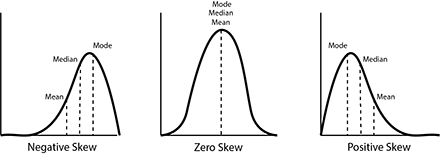

In [7]:
df.head(2)

,id,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,6,I,0.425,0.30,0.095,0.3515,0.141,0.0775,0.12,8
1,210,I,0.370,0.28,0.095,0.2655,0.122,0.0520,0.08,7


As dataset is already standardized